<a href="https://colab.research.google.com/github/tina3860/EDA-Uber-Request/blob/main/EDA_Offical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pick any ONE data set and do a complete exploratory data analysis ( EDA). The analysis should give a clear understanding of the data and the various details about the data. You can use any other data if you choose to, not bound to the data attached.

Hint: Try to come up with more than 5 questions you would like to answer based on the data and provide analysis around those question. Use visualization and pandas to explain the data.



In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#load dataset
df = pd.DataFrame
df = pd.read_csv('/content/drive/MyDrive/School/grad/Spring 24/CPSC 5175/EDA/uber_request.zip')
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**QUESTION 1**

Examine the datatypes in the dataset. Is there any variables that need to be converted or cleaned up?



In [ ]:
#print basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [ ]:
#clean request time and drop time columns

from datetime import datetime

#seperate Request timestamp into two columns: req_date and req_time

df[['req_date','req_time']] = df['Request timestamp'].str.split(' ',expand=True)
df

#seperate Drop timestamp into two columns: drop_date and drop_time

df[['drop_date','drop_time']] = df['Drop timestamp'].str.split(' ',expand=True)
df

#change all date and time columns from string types into date time format

df['req_date']=pd.to_datetime(df['req_date'],dayfirst=True)
df['req_time']=pd.to_datetime(df['req_time'],dayfirst=True)
df['drop_date']=pd.to_datetime(df['drop_date'],dayfirst=True)
df['drop_time']=pd.to_datetime(df['drop_time'],dayfirst=True)

df.info()

#convert dates to MM/DD/YYYY

df['req_date'] = df['req_date'].dt.strftime('%m/%d/%Y')
df['drop_date'] = df['drop_date'].dt.strftime('%m/%d/%Y')

#convert times to HH:MM am/pm

df['req_time'] = df['req_time'].dt.strftime('%I:%M %p')
df['drop_time'] = df['drop_time'].dt.strftime('%I:%M %p')

#remove 'Request timestamp' and 'Drop timestamp' columns
df= df.drop(columns=['Request timestamp','Drop timestamp'])

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   object        
 5   Drop timestamp     2831 non-null   object        
 6   req_date           6745 non-null   datetime64[ns]
 7   req_time           6745 non-null   datetime64[ns]
 8   drop_date          2831 non-null   datetime64[ns]
 9   drop_time          2831 non-null   datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(1), object(4)
memory usage: 527.1+ KB


,Request id,Pickup point,Driver id,Status,req_date,req_time,drop_date,drop_time
0,619,Airport,1.0,Trip Completed,07/11/2016,11:51 AM,07/11/2016,01:00 PM
1,867,Airport,1.0,Trip Completed,07/11/2016,05:57 PM,07/11/2016,06:47 PM
2,1807,City,1.0,Trip Completed,07/12/2016,09:17 AM,07/12/2016,09:58 AM
3,2532,Airport,1.0,Trip Completed,07/12/2016,09:08 PM,07/12/2016,10:03 PM
4,3112,City,1.0,Trip Completed,07/13/2016,08:33 AM,07/13/2016,09:25 AM
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,07/15/2016,11:49 PM,NaN,NaN
6741,6752,Airport,NaN,No Cars Available,07/15/2016,11:50 PM,NaN,NaN
6742,6751,City,NaN,No Cars Available,07/15/2016,11:52 PM,NaN,NaN
6743,6754,City,NaN,No Cars Available,07/15/2016,11:54 PM,NaN,NaN


**QUESTION 2**

What is the average number of requests per day?


req_date
07/11/2016    1367
07/12/2016    1307
07/13/2016    1337
07/14/2016    1353
07/15/2016    1381
dtype: int64
1349.0


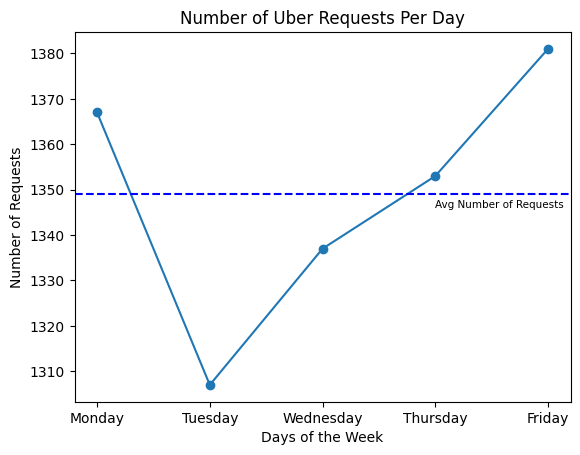

In [ ]:
#create pivot table
dups = df.pivot_table(index=['req_date'],aggfunc = 'size')
print(dups)

#print avg
avg_num_req = dups.mean()
print(avg_num_req)

#change dates to DOW
dups.index = pd.to_datetime(dups.index)
day_names = dups.index.day_name()

#plot avg
plt.plot(day_names,dups, marker = 'o')
plt.axhline(y = avg_num_req, color = 'blue', linestyle='--')
plt.title('Number of Uber Requests Per Day')
plt.xlabel('Days of the Week')
plt.ylabel('Number of Requests')
plt.annotate('Avg Number of Requests',('Thursday',1346),color = 'black',size='7.5')
plt.show()

**QUESTION 3**
What is the overall distribution of each trip status(trips completed,no cars available, trips cancelled)?

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64


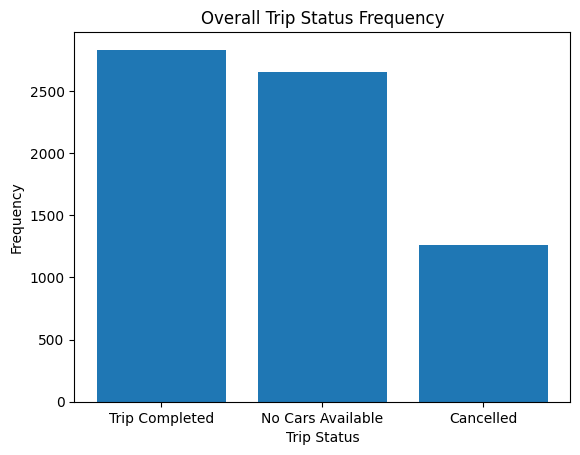

In [ ]:
df['req_date']=pd.to_datetime(df['req_date'],format = '%m/%d/%Y')
df['req_time']=pd.to_datetime(df['req_time'],format = '%I:%M %p')
df['drop_date']=pd.to_datetime(df['drop_date'],format = '%m/%d/%Y')
df['drop_time']=pd.to_datetime(df['drop_time'],format = '%I:%M %p')

#add new column to store day of the week

df['Day']=df['req_date'].dt.day_name()

#convert dates to MM/DD/YYYY

df['req_date'] = df['req_date'].dt.strftime('%m/%d/%Y')
df['drop_date'] = df['drop_date'].dt.strftime('%m/%d/%Y')

#convert times to HH:MM am/pm

df['req_time'] = df['req_time'].dt.strftime('%I:%M %p')
df['drop_time'] = df['drop_time'].dt.strftime('%I:%M %p')

df

#count num occurences of each trip status by day

trip_stat_dist = df['Status'].value_counts()
print(trip_stat_dist)

#plot
plt.bar(trip_stat_dist.index,trip_stat_dist.values)
plt.title('Overall Trip Status Frequency')
plt.xlabel('Trip Status')
plt.ylabel('Frequency')
plt.show()

**QUESTION 4**

Look at how the day of the week affects trip status.

Status     Cancelled  No Cars Available  Trip Completed
Day                                                    
Friday           240                580             561
Monday           262                504             601
Thursday         252                571             530
Tuesday          240                505             562
Wednesday        270                490             577
Index(['Friday', 'Monday', 'Thursday', 'Tuesday', 'Wednesday'], dtype='object', name='Day')
Status     Cancelled  No Cars Available  Trip Completed
Day                                                    
Monday           262                504             601
Tuesday          240                505             562
Wednesday        270                490             577
Thursday         252                571             530
Friday           240                580             561
Status     Trip Completed  No Cars Available  Cancelled
Day                                                    
Monday      

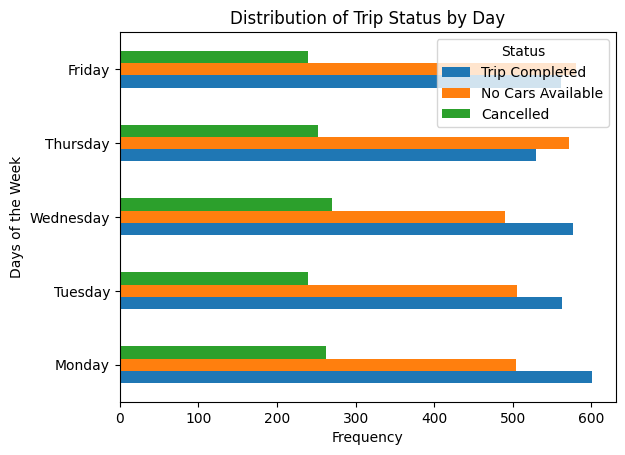

In [ ]:
#further group data by day of the week to analyze dist of trip statuses per day

trip_stat_by_day_dist = df.groupby(['Day','Status']).size().unstack()
print(trip_stat_by_day_dist)

print(trip_stat_by_day_dist.index)

#reorder DOW
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday']
trip_stat_by_day_dist = trip_stat_by_day_dist.reindex(day_order)
print(trip_stat_by_day_dist)

#reorder status order
stat_order = ['Trip Completed','No Cars Available','Cancelled']
trip_stat_by_day_dist = trip_stat_by_day_dist[stat_order]

print(trip_stat_by_day_dist)

#plot

trip_stat_by_day_dist.plot(kind='barh')
plt.title('Distribution of Trip Status by Day')
plt.xlabel('Frequency')
plt.ylabel('Days of the Week')
plt.show()

**QUESTION 5**

What is the trend in request time? Are there points of the day where the request volume is higher than normal?


In [ ]:
df

,Request id,Pickup point,Driver id,Status,req_date,req_time,drop_date,drop_time,Day
0,619,Airport,1.0,Trip Completed,07/11/2016,11:51 AM,07/11/2016,01:00 PM,Monday
1,867,Airport,1.0,Trip Completed,07/11/2016,05:57 PM,07/11/2016,06:47 PM,Monday
2,1807,City,1.0,Trip Completed,07/12/2016,09:17 AM,07/12/2016,09:58 AM,Tuesday
3,2532,Airport,1.0,Trip Completed,07/12/2016,09:08 PM,07/12/2016,10:03 PM,Tuesday
4,3112,City,1.0,Trip Completed,07/13/2016,08:33 AM,07/13/2016,09:25 AM,Wednesday
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,07/15/2016,11:49 PM,NaN,NaN,Friday
6741,6752,Airport,NaN,No Cars Available,07/15/2016,11:50 PM,NaN,NaN,Friday
6742,6751,City,NaN,No Cars Available,07/15/2016,11:52 PM,NaN,NaN,Friday
6743,6754,City,NaN,No Cars Available,07/15/2016,11:54 PM,NaN,NaN,Friday


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Request id    6745 non-null   int64  
 1   Pickup point  6745 non-null   object 
 2   Driver id     4095 non-null   float64
 3   Status        6745 non-null   object 
 4   req_date      6745 non-null   object 
 5   req_time      6745 non-null   object 
 6   drop_date     2831 non-null   object 
 7   drop_time     2831 non-null   object 
 8   Day           6745 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 474.4+ KB
0       11
1       17
2        9
3       21
4        8
        ..
6740    23
6741    23
6742    23
6743    23
6744    23
Name: Hour, Length: 6745, dtype: int64
Hour
0      99
1      85
2      99
3      92
4     203
5     445
6     398
7     406
8     423
9     431
10    243
11    171
12    184
13    160
14    136
15    171
16    159
17    418
18    510
19

Text(0, 0.5, 'Number of Requests')

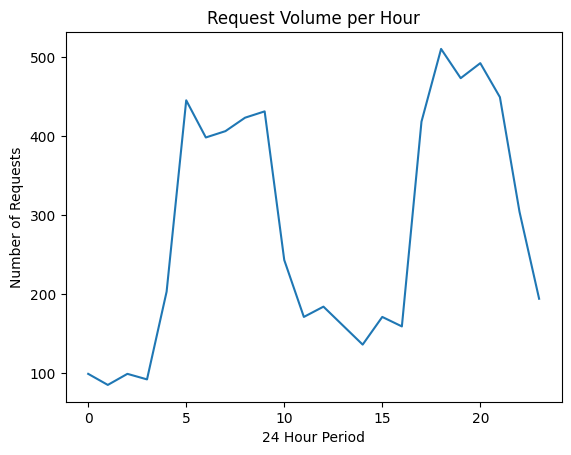

In [ ]:
#aggregate data by time intervals (hrly)
df.info()

df['req_time'] = pd.to_datetime(df['req_time'], format = '%I:%M %p')

df['Hour'] = df['req_time'].dt.hour
print(df['Hour'])

#group data by hour and count req volume
req_vol_by_hr = df.groupby('Hour').size()
print(req_vol_by_hr)

#plot
req_vol_by_hr.plot(kind='line')
plt.title('Request Volume per Hour')
plt.xticks(np.arange(0,25,step = 5))
plt.xlabel('24 Hour Period')
plt.ylabel('Number of Requests')

In [ ]:
df

,Request id,Pickup point,Driver id,Status,req_date,req_time,drop_date,drop_time,Day,Hour
0,619,Airport,1.0,Trip Completed,07/11/2016,1900-01-01 11:51:00,07/11/2016,01:00 PM,Monday,11
1,867,Airport,1.0,Trip Completed,07/11/2016,1900-01-01 17:57:00,07/11/2016,06:47 PM,Monday,17
2,1807,City,1.0,Trip Completed,07/12/2016,1900-01-01 09:17:00,07/12/2016,09:58 AM,Tuesday,9
3,2532,Airport,1.0,Trip Completed,07/12/2016,1900-01-01 21:08:00,07/12/2016,10:03 PM,Tuesday,21
4,3112,City,1.0,Trip Completed,07/13/2016,1900-01-01 08:33:00,07/13/2016,09:25 AM,Wednesday,8
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,07/15/2016,1900-01-01 23:49:00,NaN,NaN,Friday,23
6741,6752,Airport,NaN,No Cars Available,07/15/2016,1900-01-01 23:50:00,NaN,NaN,Friday,23
6742,6751,City,NaN,No Cars Available,07/15/2016,1900-01-01 23:52:00,NaN,NaN,Friday,23
6743,6754,City,NaN,No Cars Available,07/15/2016,1900-01-01 23:54:00,NaN,NaN,Friday,23


**QUESTION 6**

Analyze the distribution of trip duration. Give a summary statistics and visualize the distribution.

In [ ]:
df

,Request id,Pickup point,Driver id,Status,req_date,req_time,drop_date,drop_time,Day,Hour
0,619,Airport,1.0,Trip Completed,07/11/2016,1900-01-01 11:51:00,07/11/2016,01:00 PM,Monday,11
1,867,Airport,1.0,Trip Completed,07/11/2016,1900-01-01 17:57:00,07/11/2016,06:47 PM,Monday,17
2,1807,City,1.0,Trip Completed,07/12/2016,1900-01-01 09:17:00,07/12/2016,09:58 AM,Tuesday,9
3,2532,Airport,1.0,Trip Completed,07/12/2016,1900-01-01 21:08:00,07/12/2016,10:03 PM,Tuesday,21
4,3112,City,1.0,Trip Completed,07/13/2016,1900-01-01 08:33:00,07/13/2016,09:25 AM,Wednesday,8
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,07/15/2016,1900-01-01 23:49:00,NaN,NaN,Friday,23
6741,6752,Airport,NaN,No Cars Available,07/15/2016,1900-01-01 23:50:00,NaN,NaN,Friday,23
6742,6751,City,NaN,No Cars Available,07/15/2016,1900-01-01 23:52:00,NaN,NaN,Friday,23
6743,6754,City,NaN,No Cars Available,07/15/2016,1900-01-01 23:54:00,NaN,NaN,Friday,23


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Request id    6745 non-null   int64         
 1   Pickup point  6745 non-null   object        
 2   Driver id     4095 non-null   float64       
 3   Status        6745 non-null   object        
 4   req_date      6745 non-null   object        
 5   req_time      6745 non-null   datetime64[ns]
 6   drop_date     2831 non-null   object        
 7   drop_time     2831 non-null   object        
 8   Day           6745 non-null   object        
 9   Hour          6745 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 527.1+ KB


In [ ]:
#create new df to drop nulls
new_df = df.dropna()

In [ ]:
new_df

,Request id,Pickup point,Driver id,Status,req_date,req_time,drop_date,drop_time,Day,Hour
0,619,Airport,1.0,Trip Completed,07/11/2016,1900-01-01 11:51:00,07/11/2016,01:00 PM,Monday,11
1,867,Airport,1.0,Trip Completed,07/11/2016,1900-01-01 17:57:00,07/11/2016,06:47 PM,Monday,17
2,1807,City,1.0,Trip Completed,07/12/2016,1900-01-01 09:17:00,07/12/2016,09:58 AM,Tuesday,9
3,2532,Airport,1.0,Trip Completed,07/12/2016,1900-01-01 21:08:00,07/12/2016,10:03 PM,Tuesday,21
4,3112,City,1.0,Trip Completed,07/13/2016,1900-01-01 08:33:00,07/13/2016,09:25 AM,Wednesday,8
...,...,...,...,...,...,...,...,...,...,...
2826,1315,Airport,300.0,Trip Completed,07/11/2016,1900-01-01 22:54:00,07/11/2016,11:35 PM,Monday,22
2827,2924,City,300.0,Trip Completed,07/13/2016,1900-01-01 06:31:00,07/13/2016,07:20 AM,Wednesday,6
2828,3324,Airport,300.0,Trip Completed,07/13/2016,1900-01-01 12:33:00,07/13/2016,01:16 PM,Wednesday,12
2829,3935,Airport,300.0,Trip Completed,07/13/2016,1900-01-01 22:26:00,07/13/2016,11:43 PM,Wednesday,22


In [ ]:
new_df['req_date'] = pd.to_datetime(new_df['req_date'],format='%m/%d/%Y')
new_df['req_time'] = pd.to_datetime(new_df['req_time'],format='%I:%M %p')
new_df['drop_date'] = pd.to_datetime(new_df['drop_date'],format='%m/%d/%Y')
new_df['drop_time'] = pd.to_datetime(new_df['drop_time'],format='%I:%M %p')

#duration
duration = new_df['drop_time']- new_df['req_time']
print('Duration ' + str(duration))
new_df['Duration'] = duration

#import datetime
#calculate the duration of each trip in minutes
from datetime import datetime,timedelta
dur_mins = duration.dt.total_seconds()/60
print('dur_min ' + str(dur_mins))

Duration 0      0 days 01:09:00
1      0 days 00:50:00
2      0 days 00:41:00
3      0 days 00:55:00
4      0 days 00:52:00
             ...      
2826   0 days 00:41:00
2827   0 days 00:49:00
2828   0 days 00:43:00
2829   0 days 01:17:00
2830   0 days 00:49:00
Length: 2831, dtype: timedelta64[ns]
dur_min 0       69.0
1       50.0
2       41.0
3       55.0
4       52.0
        ... 
2826    41.0
2827    49.0
2828    43.0
2829    77.0
2830    49.0
Length: 2831, dtype: float64


<ipython-input-141-ad744becd486>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['req_date'] = pd.to_datetime(new_df['req_date'],format='%m/%d/%Y')
<ipython-input-141-ad744becd486>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['req_time'] = pd.to_datetime(new_df['req_time'],format='%I:%M %p')
<ipython-input-141-ad744becd486>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [ ]:
#some time durations are negative becausse the time durations go over into the next day.
#create function where if duration is less than 0 (negative) If the duration is negative, it adds one day to the duration to adjust it to the correct value. This is done by adding a timedelta of one day to the duration.

def adj_dur(duration):
    if duration < timedelta(0):
        duration = duration + timedelta(days=1)
    return duration


#create a total_duration column
#apply() Pandas.apply allow the users to pass a function and apply it on every single value of the Pandas series.

new_df['total_duration'] = new_df['drop_time'] - new_df['req_time']
new_df['total_duration'] = new_df['total_duration'].apply(adj_dur)

#remove duration column

new_df = new_df.drop(columns=['Duration'])

<ipython-input-142-5316e1b43314>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['total_duration'] = new_df['drop_time'] - new_df['req_time']
<ipython-input-142-5316e1b43314>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['total_duration'] = new_df['total_duration'].apply(adj_dur)


In [ ]:
new_df

,Request id,Pickup point,Driver id,Status,req_date,req_time,drop_date,drop_time,Day,Hour,total_duration
0,619,Airport,1.0,Trip Completed,2016-07-11,1900-01-01 11:51:00,2016-07-11,1900-01-01 13:00:00,Monday,11,0 days 01:09:00
1,867,Airport,1.0,Trip Completed,2016-07-11,1900-01-01 17:57:00,2016-07-11,1900-01-01 18:47:00,Monday,17,0 days 00:50:00
2,1807,City,1.0,Trip Completed,2016-07-12,1900-01-01 09:17:00,2016-07-12,1900-01-01 09:58:00,Tuesday,9,0 days 00:41:00
3,2532,Airport,1.0,Trip Completed,2016-07-12,1900-01-01 21:08:00,2016-07-12,1900-01-01 22:03:00,Tuesday,21,0 days 00:55:00
4,3112,City,1.0,Trip Completed,2016-07-13,1900-01-01 08:33:00,2016-07-13,1900-01-01 09:25:00,Wednesday,8,0 days 00:52:00
...,...,...,...,...,...,...,...,...,...,...,...
2826,1315,Airport,300.0,Trip Completed,2016-07-11,1900-01-01 22:54:00,2016-07-11,1900-01-01 23:35:00,Monday,22,0 days 00:41:00
2827,2924,City,300.0,Trip Completed,2016-07-13,1900-01-01 06:31:00,2016-07-13,1900-01-01 07:20:00,Wednesday,6,0 days 00:49:00
2828,3324,Airport,300.0,Trip Completed,2016-07-13,1900-01-01 12:33:00,2016-07-13,1900-01-01 13:16:00,Wednesday,12,0 days 00:43:00
2829,3935,Airport,300.0,Trip Completed,2016-07-13,1900-01-01 22:26:00,2016-07-13,1900-01-01 23:43:00,Wednesday,22,0 days 01:17:00


Text(0, 0.5, 'Frequency')

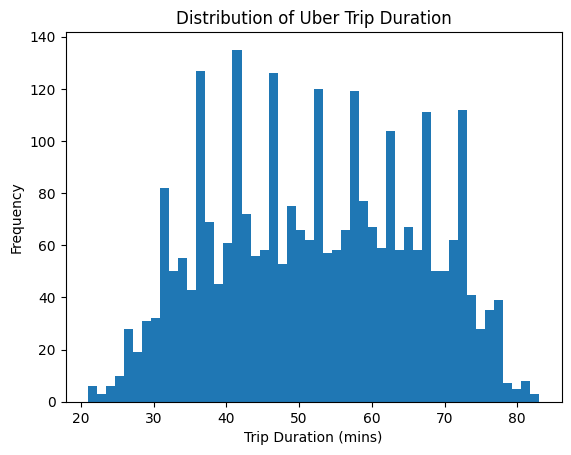

In [ ]:
#plot
plt.hist(new_df['total_duration'].dt.total_seconds() / 60, bins = 50)
plt.title('Distribution of Uber Trip Duration')
plt.xlabel('Trip Duration (mins)')
plt.ylabel('Frequency')

In [ ]:
#summary stats
import statistics as stat

#mean
avg_duration = np.mean(dur_mins)
print('Average Duration: ' + str(round((avg_duration),2)))

#median
med_duration = np.median(dur_mins)
print('Median: ' + str(med_duration))

#mode
mode_duration = stat.mode(dur_mins)
print('Mode: ' + str(mode_duration))

#std
std = stat.stdev(dur_mins)
print('Standard Deviation: ' + str(round((std))))

Average Duration: 2.56
Median: 51.0
Mode: 59.0
Standard Deviation: 263


**QUESTION 7**

What is the correlation between variables?

In [ ]:
#double check
print(df['Status'].unique())

['Trip Completed' 'Cancelled' 'No Cars Available']


0       2
1       2
2       2
3       2
4       2
       ..
6740    1
6741    1
6742    1
6743    1
6744    1
Name: status_encoded, Length: 6745, dtype: int64
0       0
1       0
2       1
3       0
4       1
       ..
6740    1
6741    0
6742    1
6743    1
6744    0
Name: pickup_encoded, Length: 6745, dtype: int64


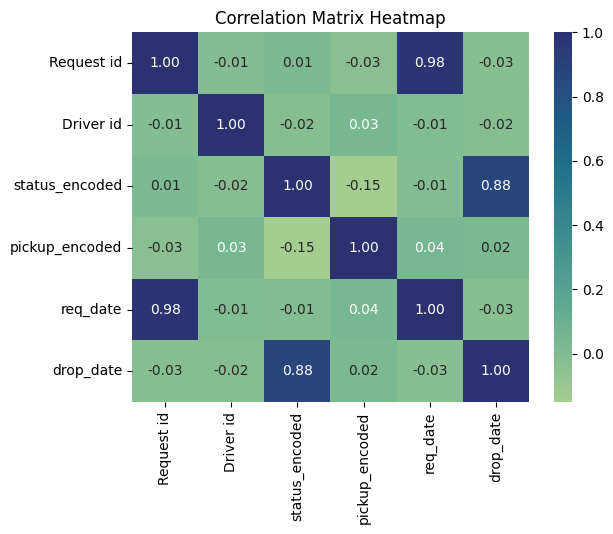

In [ ]:
df['req_date'] = pd.to_datetime(df['req_date'],format='%m/%d/%Y')
df['req_time'] = pd.to_datetime(df['req_time'],format='%I:%M %p')
df['drop_date'] = pd.to_datetime(df['drop_date'],format='%m/%d/%Y')
df['drop_time'] = pd.to_datetime(df['drop_time'],format='%I:%M %p')

#trun string categories to numbers by importing label encoder
from sklearn.preprocessing import LabelEncoder

#create instance
le = LabelEncoder()

#.fit_transform
df['status_encoded'] = le.fit_transform(df['Status'])
print(df['status_encoded'])

df['pickup_encoded'] = le.fit_transform(df['Pickup point'])
print(df['pickup_encoded'])


#convert datetime to series
df['req_date'] = pd.to_datetime(df['req_date'],format='%m/%d/%Y')
df['drop_date'] = pd.to_datetime(df['drop_date'],format='%m/%d/%Y')

#calc corr mat
correlation_matrix = df[['Request id','Driver id','status_encoded','pickup_encoded','req_date','drop_date']].corr(numeric_only = False)

#plot
import seaborn as sns
sns.color_palette('crest', as_cmap=True)
sns.heatmap(correlation_matrix, annot=True,cmap='crest',fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()